In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
fandango = pd.read_csv("/Users/leontanyongle/udemy/UNZIP_FOR_NOTEBOOKS_V6/06-Capstone-Project/fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


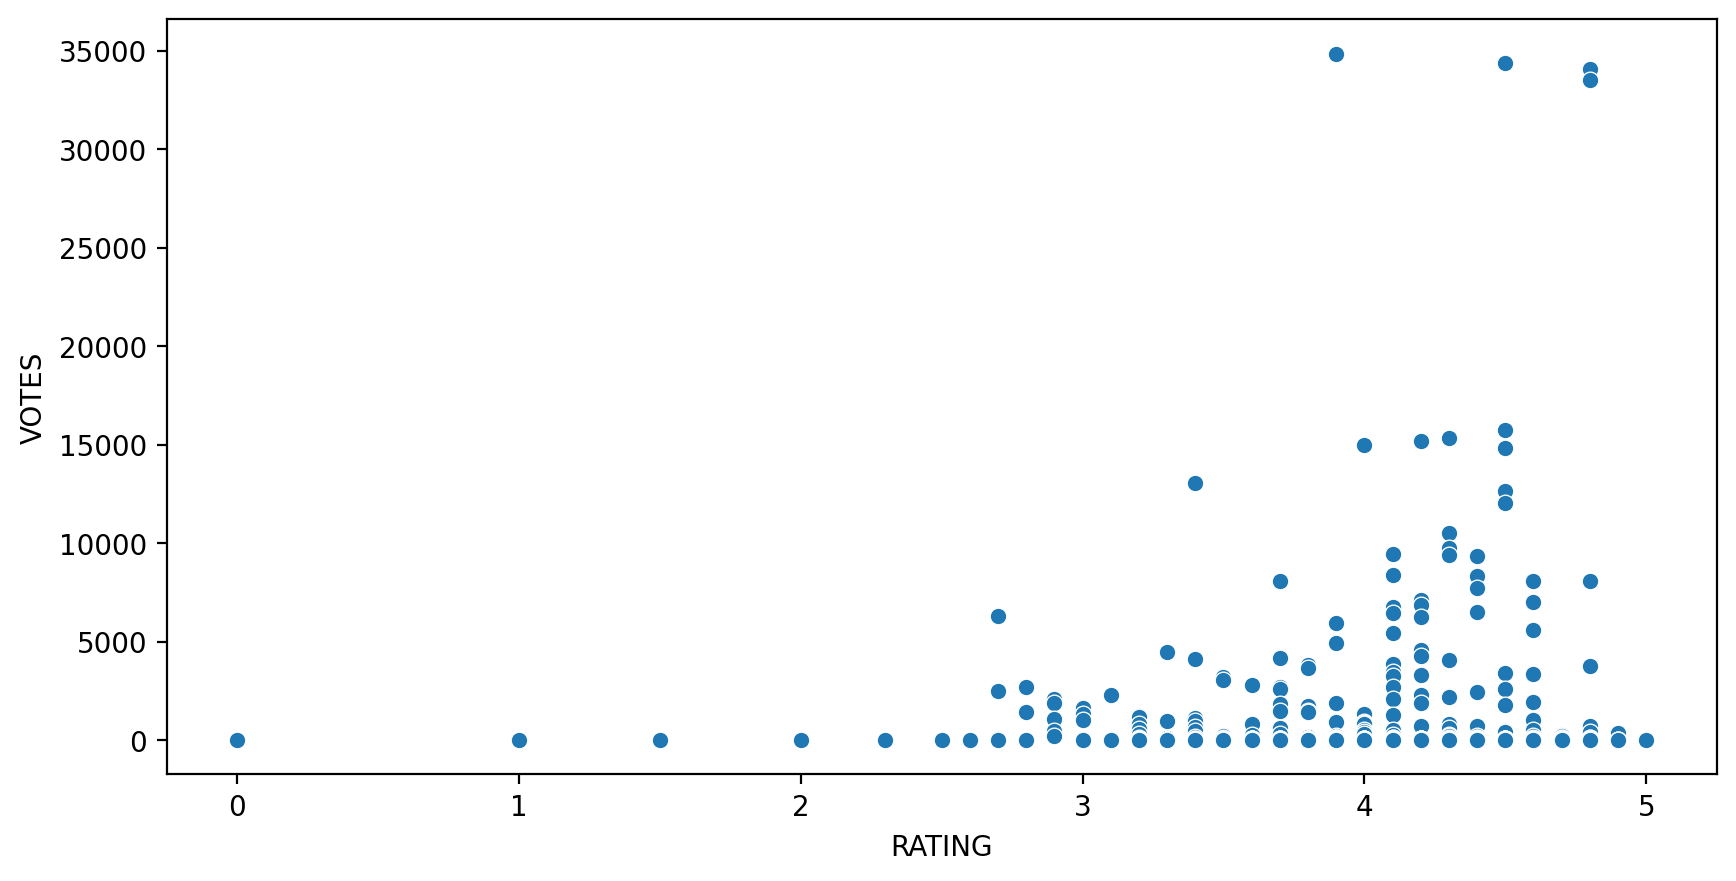

In [6]:
plt.figure(figsize=(10,5),dpi=200)

sns.scatterplot(data=fandango,y="VOTES",x="RATING");

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
fandango1 = fandango.copy()
fandango1["YEAR"] = fandango1["FILM"].str.split().str[-1]

In [9]:
fandango1["YEAR"] = fandango1["YEAR"].str.replace("(","").str.replace(")","")
fandango1["YEAR"]

# fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(")",""))

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

In [10]:
fandango1["YEAR"].value_counts()

2015    478
2014     23
2016      1
2012      1
1964      1
Name: YEAR, dtype: int64

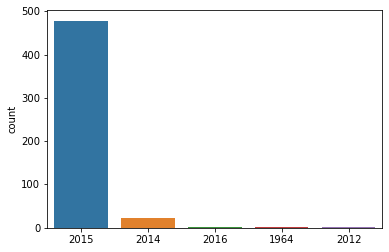

In [11]:
m_years = fandango1["YEAR"].values

plt.figure(figsize=(6,4))
sns.countplot(data=pd.DataFrame(fandango1["YEAR"]),x = m_years);

# sns.countplot(data=fandango,x='YEAR')

In [12]:
fandango1.sort_values(by="VOTES",ascending=False).head(10)

# fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [13]:
len(fandango1[fandango1["VOTES"]==0])

69

In [14]:
fandango1 = fandango1.loc[(fandango1["VOTES"]!=0)]

# fan_reviewed = fandango[fandango['VOTES']>0]

In [15]:
fandango1.reset_index(drop=True,inplace=True)

In [16]:
fandango1

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


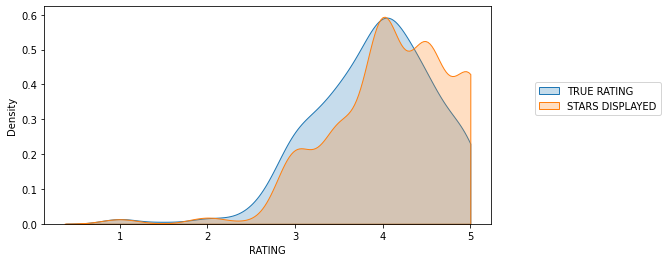

In [169]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=fandango1,x = "RATING",shade=True,clip=[0,5])
sns.kdeplot(data=fandango1,x = "STARS",shade=True,clip=[0,5])
plt.legend(labels=["TRUE RATING","STARS DISPLAYED"],loc=(1.1,0.5));

# plt.figure(figsize=(10,4),dpi=150)
# sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
# sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

# plt.legend(loc=(1.05,0.5))

In [18]:
fandango1["STARS_DIFF"] = round(fandango1["STARS"]-fandango1["RATING"],2)

In [19]:
fandango1

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [20]:
fandango1["STARS_DIFF"].value_counts()

0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: STARS_DIFF, dtype: int64

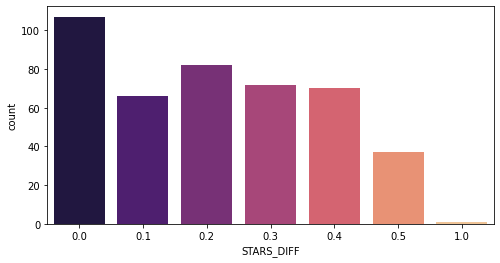

In [21]:
plt.figure(figsize=(8,4))

sns.countplot(data=fandango1,x="STARS_DIFF",palette="magma");

In [22]:
fandango1[fandango1["STARS_DIFF"] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [23]:
all_sites = pd.read_csv("/Users/leontanyongle/udemy/UNZIP_FOR_NOTEBOOKS_V6/06-Capstone-Project/all_sites_scores.csv")

In [24]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [25]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [26]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


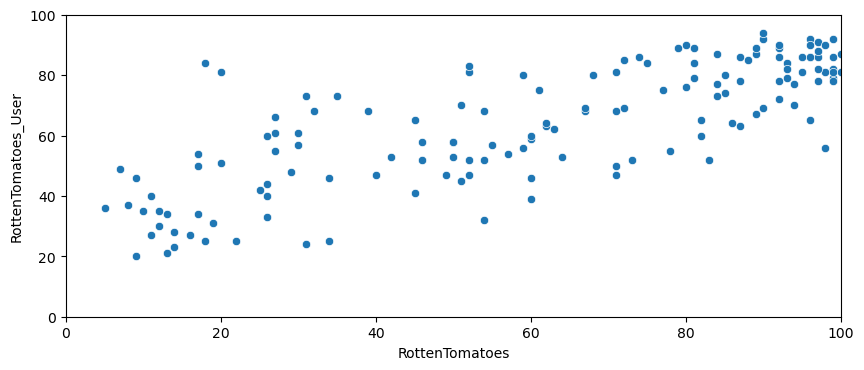

In [27]:
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data=all_sites,x="RottenTomatoes",y="RottenTomatoes_User")
plt.ylim(0,100)
plt.xlim(0,100);

In [28]:
all_sites["Rotten_Diff"] = all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"]

In [29]:
all_sites["Rotten_Diff"]

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

In [30]:
abs(all_sites["Rotten_Diff"]).mean()

# all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

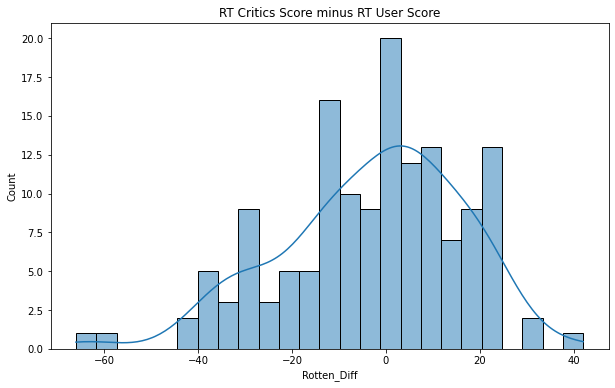

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data=all_sites, x="Rotten_Diff", kde=True,bins=25)
plt.title("RT Critics Score minus RT User Score");

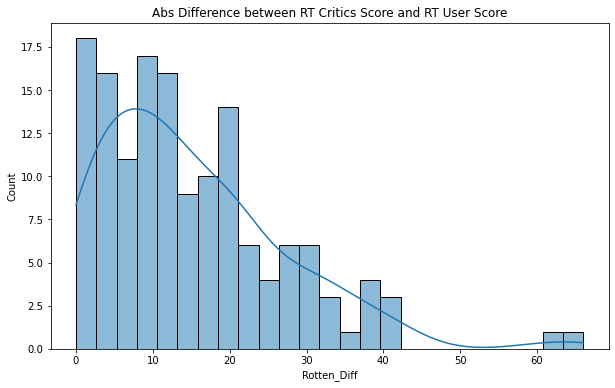

In [32]:
ab_rotten_diff = abs(all_sites["Rotten_Diff"])

plt.figure(figsize=(10,6))
sns.histplot(data=all_sites, x=ab_rotten_diff, kde=True,bins=25)
plt.title("Abs Difference between RT Critics Score and RT User Score");

# plt.figure(figsize=(10,4),dpi=200)
# sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),bins=25,kde=True)
# plt.title("Abs Difference between RT Critics Score and RT User Score");

In [33]:
all_sites.sort_values(by="Rotten_Diff")[["FILM","Rotten_Diff"]].head()

# print("Users Love but Critics Hate")
# all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [181]:
all_sites.sort_index().sort_values(by="Rotten_Diff",ascending=False,kind="mergesort")[["FILM","Rotten_Diff"]].head()

#print("Critics love, but Users Hate")
# all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


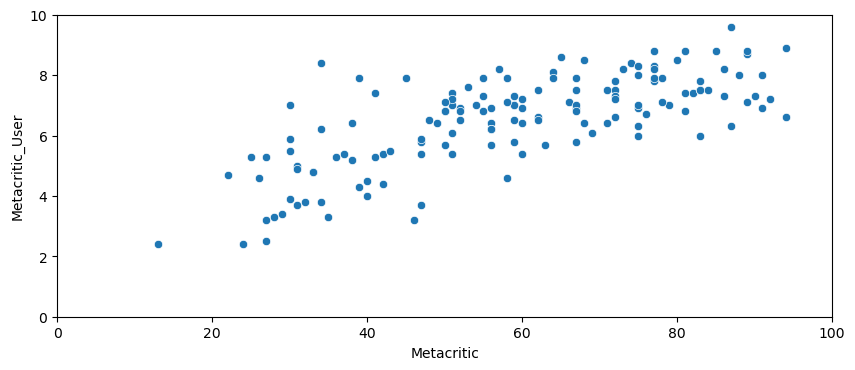

In [35]:
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data=all_sites,x="Metacritic",y="Metacritic_User")
plt.ylim(0,10)
plt.xlim(0,100);

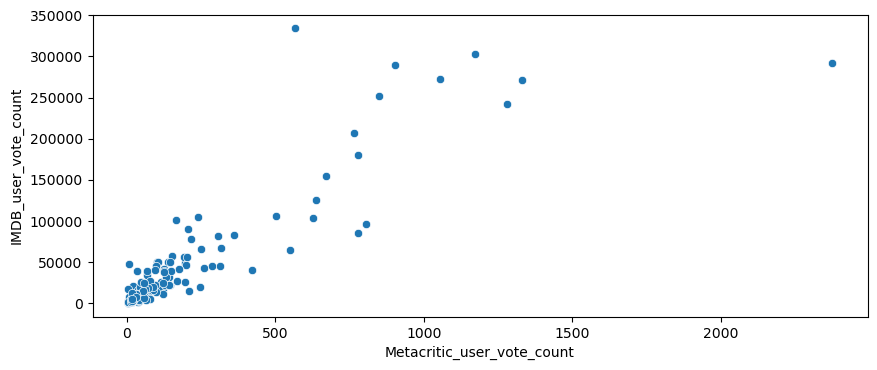

In [36]:
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data=all_sites,x="Metacritic_user_vote_count",y="IMDB_user_vote_count");

In [37]:
all_sites[all_sites["IMDB_user_vote_count"] == all_sites["IMDB_user_vote_count"].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [38]:
all_sites[all_sites["Metacritic_user_vote_count"] == all_sites["Metacritic_user_vote_count"].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [39]:
df = fandango1.merge(all_sites,how="inner")

In [40]:
df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

In [42]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8


In [43]:
df[["RT_Norm","RTU_Norm","Meta_Norm"]] = df[["RottenTomatoes","RottenTomatoes_User","Metacritic"]].apply(lambda x: round(x/20,1))
df[["Meta_U_Norm","IMDB_Norm"]] = df[["Metacritic_User","IMDB"]].apply(lambda x: round(x/2,1))

In [44]:
# df[["RT_Norm","RTU_Norm","Meta_Norm"]]=df[["RT_Norm","RTU_Norm","Meta_Norm"]].apply(lambda x: x*2)

In [45]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [46]:
norm_scores = df[["STARS","RATING","RT_Norm","RTU_Norm","Meta_Norm","Meta_U_Norm","IMDB_Norm"]]

In [47]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [172]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

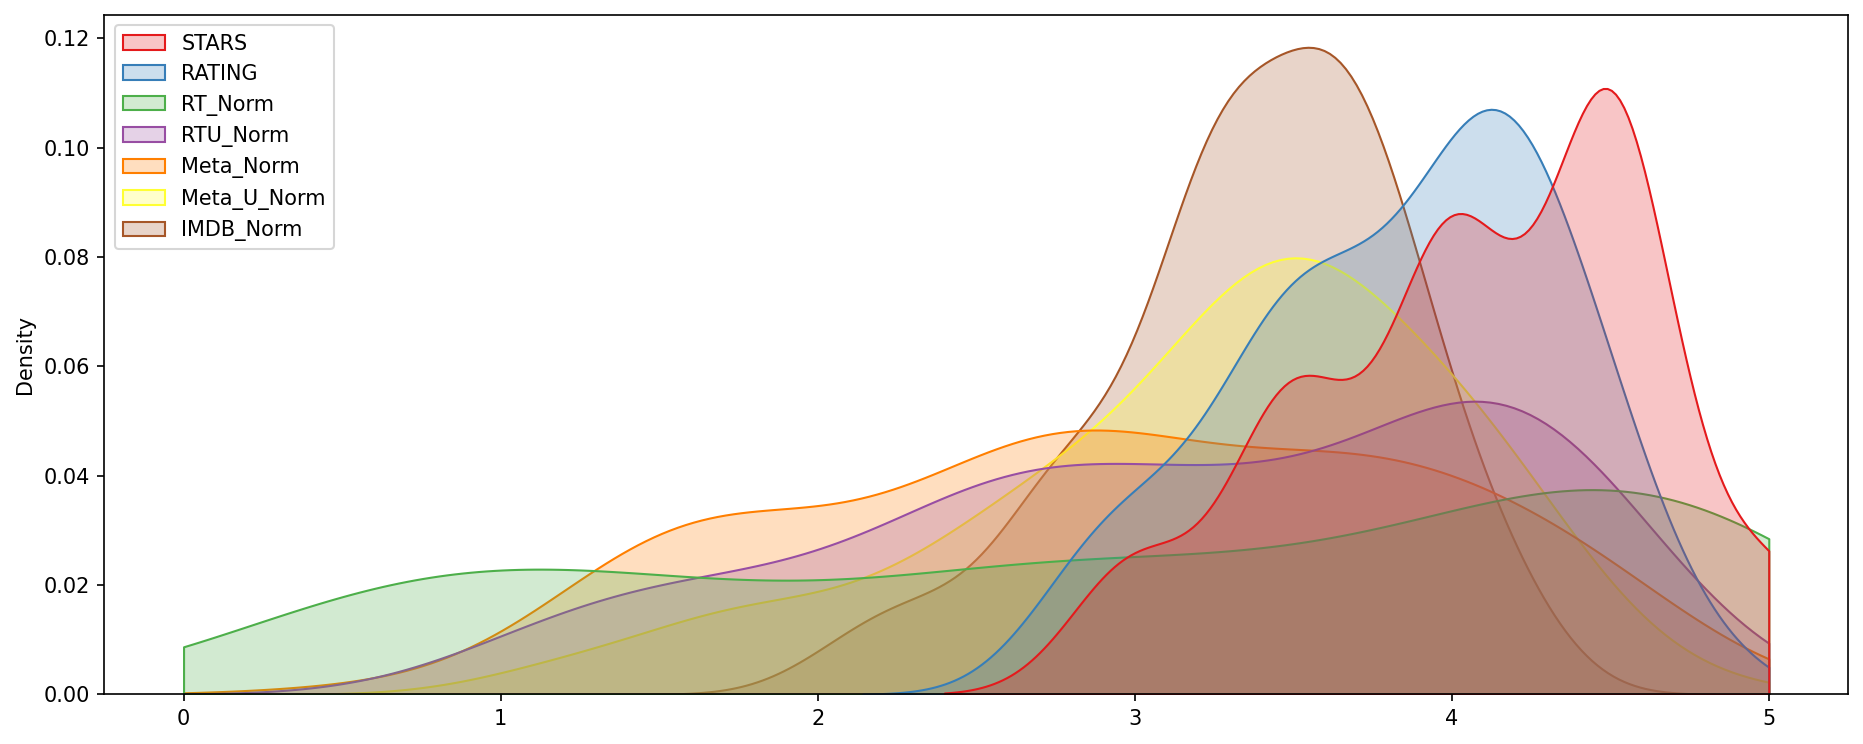

In [174]:
fig,ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,shade=True,clip=[0,5],palette="Set1",ax=ax)
move_legend(ax, "upper left");

# plt.figure(figsize=(8,6),dpi=200)
# sns.kdeplot(data=norm_scores,shade=True,clip=[0,5],palette="Set1")
# plt.legend(labels=norm_scores.columns,loc="upper left");

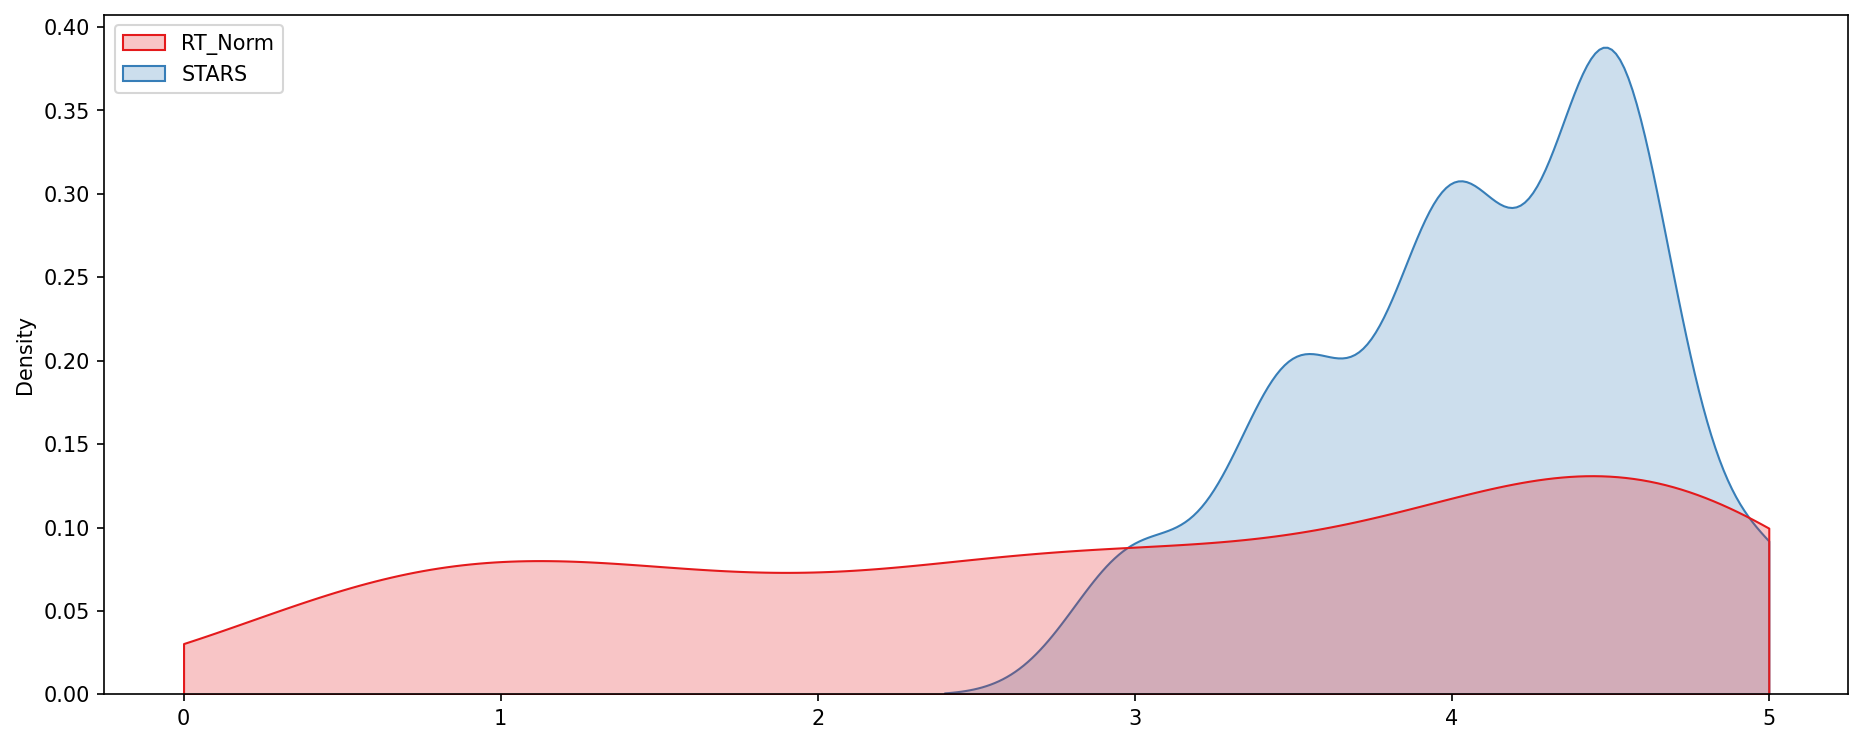

In [176]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[["RT_Norm","STARS"]],shade=True,clip=[0,5],palette="Set1",ax=ax)
move_legend(ax, "upper left");

# plt.figure(figsize=(6,4))
# new_norm = norm_scores[["RT_Norm","STARS"]]
# sns.kdeplot(data=new_norm,shade=True,clip=[0,5])
# plt.legend(labels=new_norm,loc="upper left");

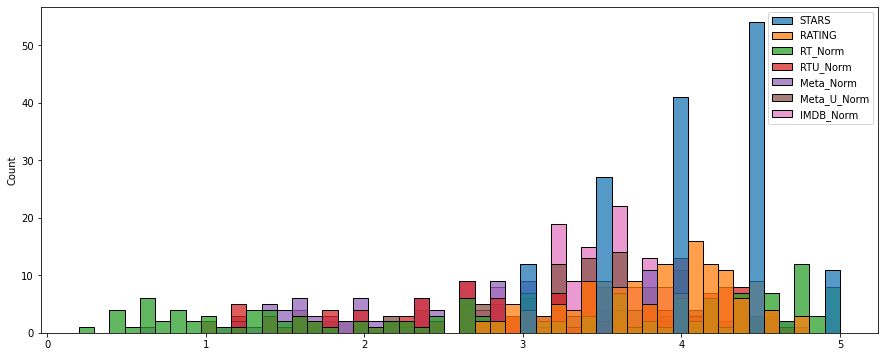

In [178]:
plt.figure(figsize=(15,6))
sns.histplot(data=norm_scores,bins=50);

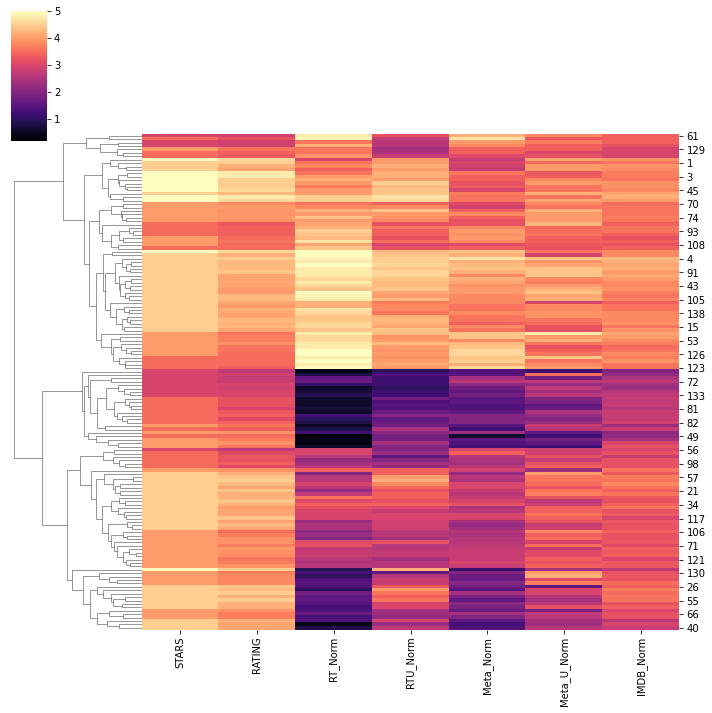

In [179]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False);

# plt.figure(figsize=(10,6))
# sns.clustermap(norm_scores,cmap="magma");

In [110]:
film = df["FILM"]
norm_scores7 = pd.concat([norm_scores,df["FILM"]],axis=1)

# norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

# norm_films.nsmallest(10,'RT_Norm')

In [114]:
norm_scores7.iloc[78]

STARS                       3.5
RATING                      3.2
RT_Norm                     0.6
RTU_Norm                    1.5
Meta_Norm                   1.4
Meta_U_Norm                 1.6
IMDB_Norm                   2.8
FILM           Mortdecai (2015)
Name: 78, dtype: object

In [165]:
# norm_scores7.sort_values(by="RT_Norm")[["STARS","RATING","RTU_Norm","Meta_Norm","Meta_U_Norm","IMDB_Norm","FILM"]].head(10)
norm_scores7.sort_index().sort_values('RT_Norm', kind='mergesort').head(10)

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


In [166]:
norm_scores8 = norm_scores7.sort_index().sort_values('RT_Norm', kind='mergesort').head(10)

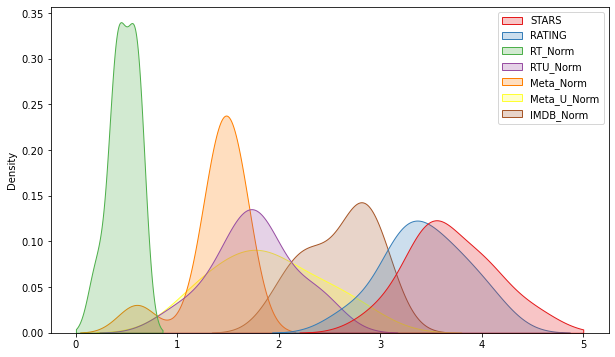

In [180]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=norm_scores8,shade=True,clip=[0,5], palette="Set1");
# plt.legend(labels=norm_scores7.columns,loc="upper left");

# plt.figure(figsize=(15,6),dpi=150)
# worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
# sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
# plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

In [168]:
norm_scores7.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                   3
FILM           Taken 3 (2015)
Name: 25, dtype: object